In [1]:
import numpy as np
import pandas as pd
from scipy.io import mmread
import matplotlib.pyplot as plt
from tifffile import imread
import os
from scipy.stats import zscore
from sklearn.metrics import pairwise_distances
from scipy.optimize import linear_sum_assignment
from scipy.stats import pearsonr, spearmanr
from tqdm import tqdm
import seaborn as sns
import pickle

In [2]:
# marker names for immune, tumor, and their overlap
immune_markers = ['DNA_1','CD3', 'PDL1', 'GRZB','Ki67', 'PanCK', 'CD45','CD68', 'CD3d', 'CD8a',
             'CD163', 'aSMA', 'CD14','CD4', 'FOXP3', 'PDL1_2','CD11b', 'pRB', 'PD1',
             'LaminABC', 'PDL1_3', 'LAG3','CD20', 'HLA_A', 'MHC_II_DPB1']
tumor_markers = ['DNA_1','CD3', 'pERK', 'Rad51','CCND1', 'Vimentin', 'aSMA','Ecad', 'ER', 'PR',
            'EGFR', 'pRB', 'HER2','Ki67', 'CD45', 'p21','CK14','CK19', 'CK17',
            'LaminABC', 'AR', 'H2Ax','PCNA','PanCK', 'CD31']
shared_markers = ['DNA_1','CD3','aSMA','pRB','PanCK','CD45','Ki67','LaminABC']

In [3]:
def ids_to_table(ids, table):
    match_table = table[table['CellID'].isin(ids)] # get relevant rows
    df1 = match_table.set_index('CellID')
    match_table = df1.reindex(ids) # set new table in correct order
    return match_table

def get_correlations(markers, immune_table, tumor_table):
    correlations = []
    for i,s in enumerate(markers):
        correlations.append(spearmanr(immune_table[s],tumor_table[s])[0])
    return correlations

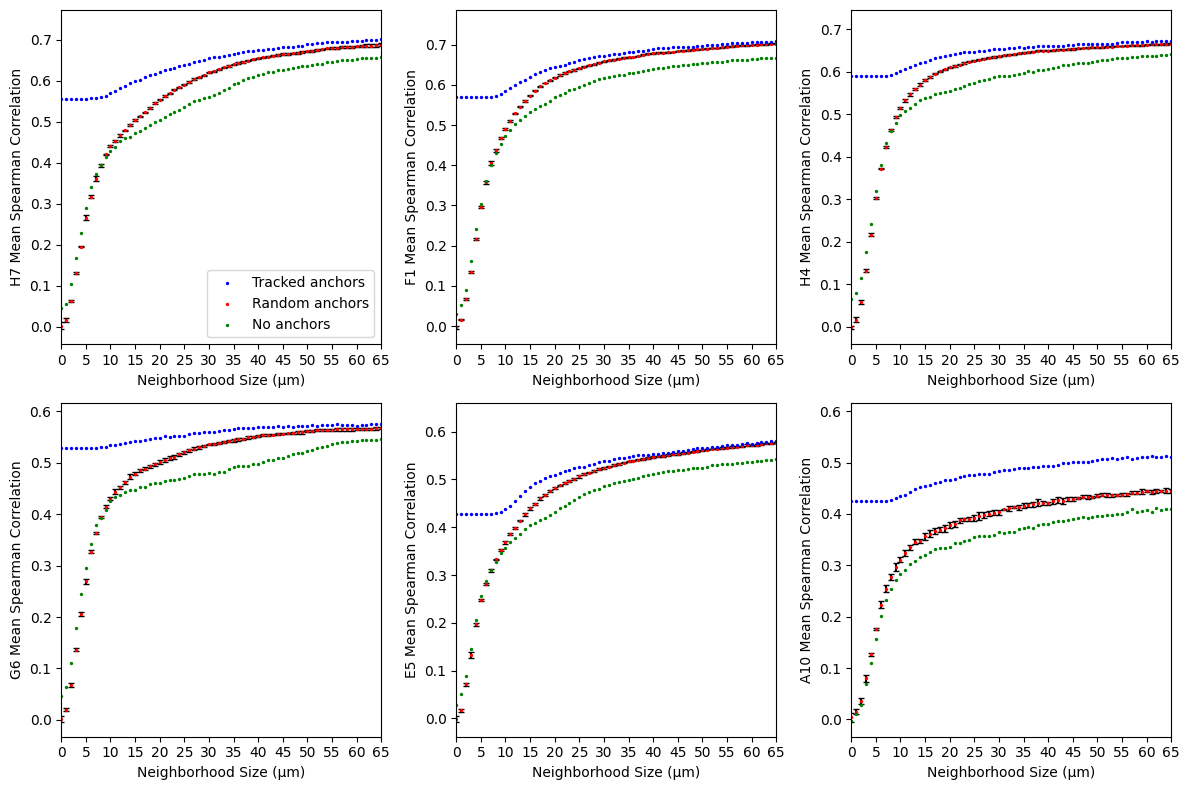

In [7]:
fig, ax = plt.subplots(2,3, figsize=(12,8))
ax = ax.flatten()
radii = [i for i in range(301)]
cores = ['H7','F1','H4','G6','E5','A10']
path = 'coexist/figures/S2/Neighborhood_expansion_result_supplementary'
for i,c in enumerate(cores):
    with open(os.path.join(path,f'sla_random_spearman_{c}.pkl'),'rb') as handle:
        sla_random = np.array(pickle.load(handle))
    
    with open(os.path.join(path,f'sla_track_spearman_{c}.pkl'),'rb') as handle:
        sla_track = pickle.load(handle)
    
    with open(os.path.join(path,f'sla_all_spearman_{c}.pkl'),'rb') as handle:
        sla_all = pickle.load(handle)

    sla_random_mean = np.mean(sla_random, axis=0)
    sla_random_std = np.std(sla_random, axis=0)

    ax[i].scatter(radii, sla_track, color='blue', label='Tracked anchors',s=2,zorder=2)
    ax[i].scatter(radii, sla_random_mean, color='red',label='Random anchors',s=2,zorder=1)
    ax[i].scatter(radii, sla_all, color='green',label='No anchors',s=2)
    ax[i].errorbar(radii, sla_random_mean, yerr=sla_random_std,fmt="none",ecolor='black',capsize=2,zorder=0)
    ax[i].set_xlabel(u'Neighborhood Size (\u03bcm)')
    ax[i].set_ylabel(f'{c} Mean Spearman Correlation')
    ax[i].set_xticks([j*5 for j in range(14)])
    ax[i].set_xlim([0,65])
ax[0].legend()
plt.tight_layout()
plt.savefig('Radius_expansion_supplementary.png',dpi=600)
plt.show()